### Einops for simple audio processing

The examples below show how to use einops to process audio data. 

In [22]:
from einops import rearrange, repeat, reduce
import numpy as np
from matplotlib import pyplot as plt

### Let us create a sine wave

In [23]:
#  create a sine wave with frequency of 200 Hz
#  sample rate of 8000 Hz
#  duration of 1 second
sample_rate = 8000
duration = 1
frequency = 200
t = np.linspace(0, duration, sample_rate * duration)
wave = np.sin(2 * np.pi * frequency * t)

# play the wave
from IPython.display import Audio
Audio(wave, rate=sample_rate)


#### Double the frequency using `einops` and hear the difference

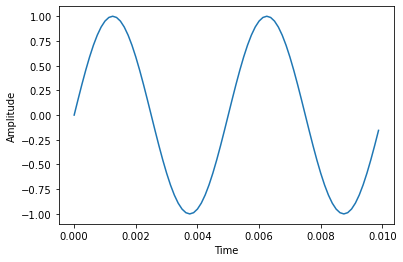

(8000,)
(16000,)
(8000,)


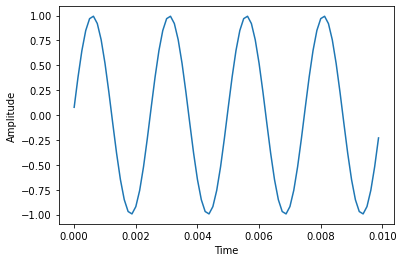

In [24]:
# plot the wave versus time
plt.plot(t[:80], wave[:80])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()
print(wave.shape)

# double the duration of the wave
wave2 = repeat(wave, 't -> (2 t)')
print(wave2.shape)
# sample at twice the rate
wave2 = reduce(wave2, '(t 2) -> t', 'mean')
print(wave2.shape)
plt.plot(t[:80], wave2[:80])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

# play the wave
from IPython.display import Audio
Audio(wave2, rate=sample_rate)